# `Linear Regression on images Tutorial`
by Dominic Waithe (c) 2020
### Introduction
* This notebook covers different code implementations from the scikit learn and pandas library, including:
  * Importing image data
  * Recaling and Standardizing Data 
  * Linear regression
  * Residuals
  * Plotting 

### Approach and Exercises
* Each section will help reinforce your learning. We suggest you:
    * Read each cell before you run it.
    * Ponder the meaning and function of all the commands.
    * Try altering some of the code to see what happens.
   

## 1. Tutorial set up 
* Import statements
* Loading the datasets
* Reviewing the ML problem

In [1]:
# import statements 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.dummy import DummyRegressor
from sklearn.metrics import mean_squared_error
import pandas as pd
import numpy as np
import matplotlib.pylab as plt

# we will generally import scikit learn libraries when the are required, so you understand which specifc libraries are required 

In [2]:
#Files download, you should only need to do this once.
import requests, zipfile, io
zip_file_url = "http://sara.molbiol.ox.ac.uk/dwaithe/files/fluoCells.zip"
#This command downloads a .zip file
r = requests.get(zip_file_url)
z = zipfile.ZipFile(io.BytesIO(r.content))
z.extractall()
#It will download the data form the server, and unzip in the directory where you run your notebook from.

Text(0.5, 1.0, 'Ground-truth image')

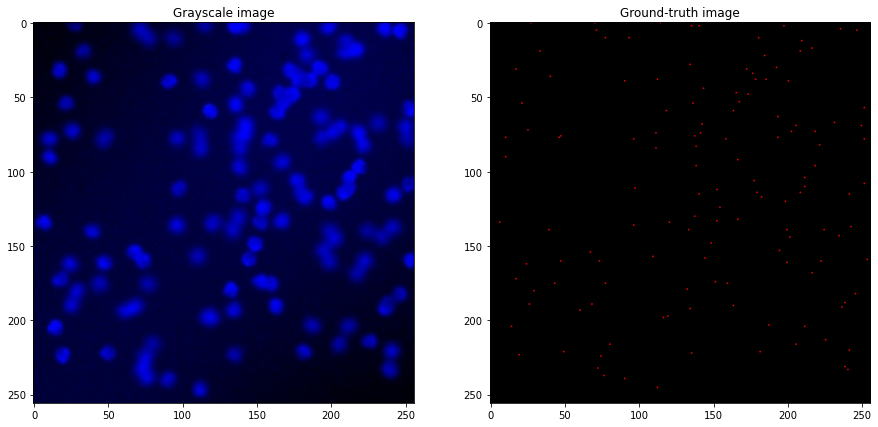

In [3]:
fig,pane =plt.subplots(1,2,figsize=(15,15))
img = plt.imread('fluoCells/001cell.png')#Reads the image in.
gti = plt.imread('fluoCells/001dots.png')#Reads the ground-truth image in.
pane[0].imshow(img)#plots image to left pane
pane[1].imshow(gti)#plots image to right pane.
pane[0].set_title('Grayscale image')
pane[1].set_title('Ground-truth image')


 * We have a number of images (200) with matching ground-truth images.  
 * In future we want to be able to predict number of cells in image, without having to make ground-truth. 
 * Can we learn the relationship between these images and their ground-truths and predict the cell counts?

In [16]:
#Lets import the images and make a dataframe for the data
name_array = []
gray_intensity = []
gt_count = []
for i in range(0,200):
    n = str(i+1).zfill(3)
    name_array.append(n+"cell")
    img = plt.imread("fluoCells/"+n+"cell.png")#Reads the image in.
    gti = plt.imread("fluoCells/"+n+"dots.png")
    gray_intensity.append(np.sum(img))
    gt_count.append(np.sum(gti))

#print and example
data = pd.DataFrame(list(zip(gray_intensity,gt_count)),columns=['gray_intensity','ground-truth'],index=name_array)
data.head()

,gray_intensity,ground-truth
001cell,20235.419922,135.0
002cell,27686.384766,233.0
003cell,15349.925781,82.0
004cell,15350.378906,86.0
005cell,16923.193359,96.0


## 2. Data processing and visualisation
* Scale data
* Generate training/test data

In [14]:
#Extract our training pairs.
y = data['ground-truth']
X = np.array(data['gray_intensity']).reshape(-1, 1)#We reshape here to make our list into a 2-D array. This is need for the scalar function, which experts a 2-D array.
# Rescaling and Standardizing Data 
# Machine Learning algorithms can receive perform benefits from data that has been rescaled and standardized, either in terms of speed or accuracy, or both.
# There are a number of different ways of doing this, and implementations may vary because of algorithm requirements or personal preference.
# This can be done easily using the pandas framework.
# Create scaler object:
scaler = StandardScaler()
# fit the scaler - this calculates the mean and std of the data.
scaler.fit(X)
# transform the data using the fitted scaler - this applies the transform using the fit
sta_X = scaler.transform(X)

print('mean',np.round(np.mean(sta_X),0))
print('std',np.std(sta_X))

mean -0.0
std 1.0


has a high degree of correlation 0.9912566989929834


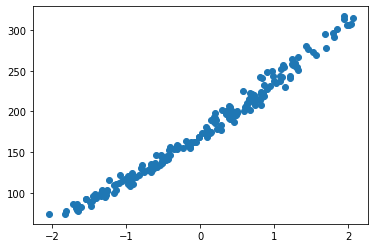

In [6]:
#Lets the plot the relationship between our X and y
plt.plot(sta_X,y,'o')
print('has a high degree of correlation',np.corrcoef(sta_X.reshape(-1),y)[1][0])
#But is not perfect and so we can use linear regression, its not deterministic.

In [17]:
#We want to make predictions with our model and so we will split the data into indpendent train and test sets.
#test_size = 0.3, '0.3' means 70% data goes to training, and 30% goes to testing
X_train, X_test, y_train, y_test = train_test_split(sta_X,y, test_size=0.3, random_state=1)


## 3. Fitting machine learning model
* Fit data to model
* Extract parameters
* Visualise model fit
* Calculate and visualise residuals

In [18]:
#This is our sanity check. Our method should beat this.
dummy_regr = DummyRegressor(strategy="mean") # This draws a dummy regression line
dummy_regr.fit(X_train, y_train) #fit the random line to the data
y_prob = dummy_regr.predict(X_test)
print('Dummy regressor:')
print('Mean Squared Error (the lower the better)',mean_squared_error(y_test,y_prob))
# the error rate should be high for the dummy regression line

#This is our linear regression model.
linear = LinearRegression()
linear.fit(X_train,y_train)
y_pred = linear.predict(X_test)
print('Linear regressor:')
print('Mean Squared Error (the lower the better)',mean_squared_error(y_test,y_pred))
print('Root Mean Squared Error (average error per point)',np.sqrt(mean_squared_error(y_test,y_pred)))
# the error rate should be lower as the regression line fits with your data

Dummy regressor:
Mean Squared Error (the lower the better) 4298.9800000000005
Linear regressor:
Mean Squared Error (the lower the better) 68.10693810896474
Root Mean Squared Error (average error per point) 8.252692779266942


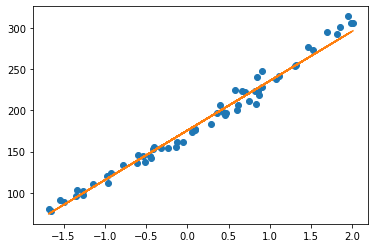

In [19]:
#Lets plot our line.
M = linear.coef_ #This is how we extract our parameters (M, the gradient of the fit line).
c = linear.intercept_ #This is how we extract our parameters (c, the y_intercept of the  fit line).
plt.plot(X_test,y_test,'o') #'o' is shorthand for the dots, 'ro' is for red dots
plt.plot(X_test,M*X_test+c,'-') #'-'is shorthand for line, 'g-' is for green lines

In [20]:
#Lets plot it has a nice table
#'zip' here means extract one value from one row then next one by one
pred_data = pd.DataFrame(list(zip(y_test,y_pred,y_test-y_pred)),index=y_test.index,columns=['ground-truth','prediction','difference'])
pred_data.head()
#Notice the diff. This is our residuals

,ground-truth,prediction,difference
059cell,103.0,95.504192,7.495808
041cell,223.0,226.902792,-3.902792
035cell,142.0,149.438922,-7.438922
103cell,254.0,253.859660,0.140340
185cell,248.0,230.194033,17.805967


Text(0, 0.5, 'Error')

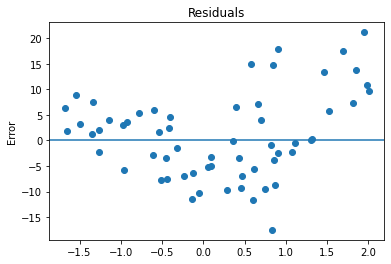

In [21]:
#Now lets plot the residuals
plt.plot(X_test,pred_data['difference'],'o')
#plt.plot(np.arange(0,pred_data.shape[0]),[0]*pred_data.shape[0],'--')
plt.axhline(y=0)
plt.title("Residuals")
plt.ylabel('Error')

### 4. Non-linear data.
In this exercise we try and fit a straight-line to some data which is not linear.

In [33]:
#Here I just make up some data.
X_nonlin = np.arange(0,100)
y_nonlin = (X_nonlin*0.4 +(X_nonlin**2)*0.08 + 5)+(np.random.normal(size=100)-0.5)*15
display (y_nonlin)

array([  8.53780132,   8.07780518, -29.77566787, -20.03660181,
       -27.38838682,  23.51995458,  19.68051954,  20.8161889 ,
         5.04737782, -12.57091122,  -2.39039111,  31.12600267,
        16.61329562,  22.76173164,  12.28733774,  35.6101615 ,
        29.27762117,  18.30087383,  40.9305608 ,  45.39596347,
        34.33540705,  35.48611589,  43.2529934 ,  33.52780553,
        71.4479717 ,  60.5327769 ,  50.77047763,  61.65875273,
        88.16034375,  68.78469694,  73.92824819,  85.53027238,
        90.82114259,  89.15893356,  75.3785558 , 104.56135527,
       128.04923674, 106.08541807, 154.4089473 , 116.05398584,
       143.27879335, 144.35356871, 142.30566229, 122.490183  ,
       152.45849608, 170.95466325, 225.79014365, 201.67178139,
       203.88103956, 207.9213329 , 238.50091272, 224.62782663,
       232.57869539, 252.00193163, 236.35555458, 245.38709001,
       267.17284405, 274.99184789, 277.64129111, 295.15985545,
       301.52309329, 303.60519012, 319.94045322, 366.80

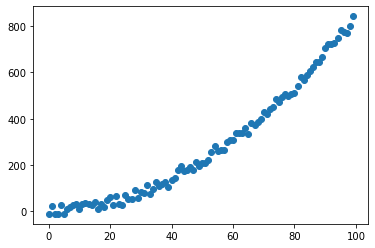

In [23]:
#plotting the data.
plt.plot(X_nonlin, y_nonlin,'o')

In [24]:
print('has a high degree of correlation',np.corrcoef(X_nonlin,y_nonlin)[1][0])
#This data is still highly correlated.
#np.corrcoef needs to be done on array list rather than matrix
#TODO:
#Exercise. Fit this data with a linear regression model and then calculate the residuals.
#How do the residuals look? Can you see evidence of the non-linearity in the data.


has a high degree of correlation 0.9658475459478244


In [26]:
# Reshape the X value
X_nonlin = np.array(X_nonlin).reshape(-1, 1)
display(X_nonlin)

array([[ 0],
       [ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10],
       [11],
       [12],
       [13],
       [14],
       [15],
       [16],
       [17],
       [18],
       [19],
       [20],
       [21],
       [22],
       [23],
       [24],
       [25],
       [26],
       [27],
       [28],
       [29],
       [30],
       [31],
       [32],
       [33],
       [34],
       [35],
       [36],
       [37],
       [38],
       [39],
       [40],
       [41],
       [42],
       [43],
       [44],
       [45],
       [46],
       [47],
       [48],
       [49],
       [50],
       [51],
       [52],
       [53],
       [54],
       [55],
       [56],
       [57],
       [58],
       [59],
       [60],
       [61],
       [62],
       [63],
       [64],
       [65],
       [66],
       [67],
       [68],
       [69],
       [70],
       [71],
       [72],
       [73],
       [74],
       [75],
       [76],

In [27]:
# Normalize the data
scaler = StandardScaler()
# fit the scaler - this calculates the mean and std of the data.
scaler.fit(X_nonlin)
# transform the data using the fitted scaler - this applies the transform using the fit
sta_X_nonlin = scaler.transform(X_nonlin)
print('mean',np.round(np.mean(sta_X_nonlin),0))
print('std',np.std(sta_X_nonlin))

mean 0.0
std 1.0


In [28]:
#This is our linear regression model.
linear = LinearRegression()
linear.fit(sta_X_nonlin,y_nonlin)
y_pred = linear.predict(sta_X_nonlin)
print('Linear regressor:')
print('Mean Squared Error (the lower the better)',mean_squared_error(y_nonlin,y_pred))
print('Root Mean Squared Error (average error per point)',np.sqrt(mean_squared_error(y_nonlin,y_pred)))
# the error rate should be lower as the regression line fits with your data

Linear regressor:
Mean Squared Error (the lower the better) 4080.8444370943425
Root Mean Squared Error (average error per point) 63.88148743645801


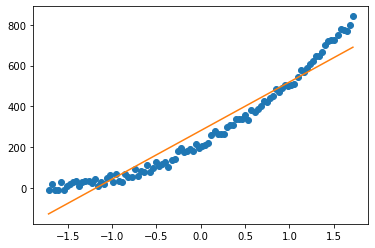

In [29]:
#Plot the line.
M = linear.coef_ #This is how we extract our parameters (M, the gradient of the fit line).
c = linear.intercept_ #This is how we extract our parameters (c, the y_intercept of the  fit line).
plt.plot(sta_X_nonlin,y_nonlin,'o') #'o' is shorthand for the dots, 'ro' is for red dots
plt.plot(sta_X_nonlin,M*sta_X_nonlin+c,'-') #'-'is shorthand for line, 'g-' is for green lines

In [31]:
#Calculate the difference/error/residuals between y_nonlin and y_pred
#'zip' here means extract one value from one row then next one by one
pred_data = pd.DataFrame(list(zip(y_nonlin,y_pred,y_nonlin-y_pred)),columns=['y_nonlin','y_pred','difference'])
pred_data.head()
#Notice the diff. This is our residuals

,y_nonlin,y_pred,difference
0,-9.376329,-126.843438,117.467109
1,21.648074,-118.594271,140.242345
2,-9.077945,-110.345105,101.267160
3,-9.923189,-102.095938,92.172750
4,28.407860,-93.846772,122.254632


Text(0, 0.5, 'Error')

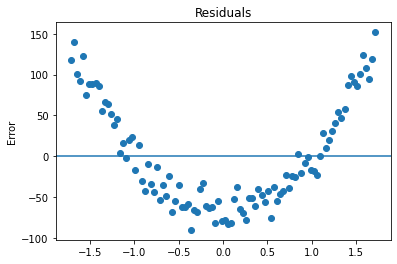

In [32]:
#Plot the residuals
plt.plot(sta_X_nonlin,pred_data['difference'],'o')
#plt.plot(np.arange(0,pred_data.shape[0]),[0]*pred_data.shape[0],'--')
plt.axhline(y=0)
plt.title("Residuals")
plt.ylabel('Error')

## 5. Review
* We have covered:
  * Scaling and Standardizing Data 
  * Regression machine learning algorithms
  * Correlation of data
  * Residuals
  * non-linear data.
* We have of course not covered everything that it is possible to cover, and there is plenty more to research. 
* If you want to do more, you can do the advanced linear regression notebook  or....
* If you are really serious about doing image analysis with Python please check this site: https://github.com/IAFIG-RMS/Python-for-Bioimage-Analysis